<a href="https://colab.research.google.com/github/vandit98/linear_models/blob/main/linear_model_linear_regressor_vs_ridge_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sbs
import pandas as pd
sbs.set()

In [ ]:
dataset=pd.read_csv("Churn_Modelling.csv")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# selecting one feature to apply linear regression
# i am selecting credit score
# important point to note here is that if we use .values then we are converting a dataframe to numpy array
# this is an datset
x_train_feature=dataset.iloc[:,[3]]
print(type(x_train_feature))
print(x_train_feature.head())
# lets make a numpy array
x=dataset.iloc[:,[3]].values
print(type(x))
print(x.size)


<class 'pandas.core.frame.DataFrame'>
   CreditScore
0          619
1          608
2          502
3          699
4          850
<class 'numpy.ndarray'>
10000


In [ ]:
# selecting y as array
y=dataset.iloc[:,[6]].values    #age

In [ ]:
# splitting the data into test and train set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

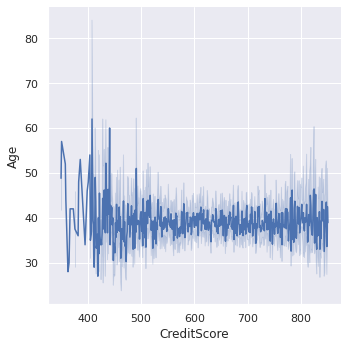

In [ ]:
sbs.relplot(x="CreditScore",y="Age",data=dataset,kind='line')
# here we can observe that most of the people have their age around [35.45]

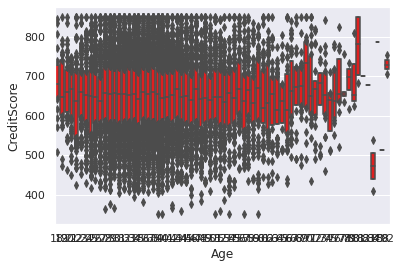

In [ ]:
sbs.boxplot(x='Age',y='CreditScore',data=dataset,whis=[25,45],color='red')
# we can use boxen plot to deal with outlier handling

In [ ]:
x_train.size

7500

In [ ]:
y_train.size

7500

In [ ]:
x_test.size

2500

In [ ]:
# creating the model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)


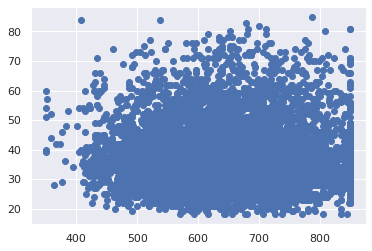

In [ ]:
# lets plot the best fitting line
plt.scatter(x_train,y_train)
# here we can observe that their are very less people with their credits less than 400 and most of them lie around 600-700

In [ ]:
# now lets compare it with Ridge regression

regressor2=Ridge(alpha=0.5)
regressor2.fit(x_train,y_train)
y_pred2=regressor2.predict(x_test)

In [ ]:
#  now lets compare it with lasso regression
regressor3=Ridge(alpha=0.5)
regressor3.fit(x_train,y_train)
y_pred3=regressor3.predict(x_test)

In [ ]:
# lets find the least squared error
from sklearn.metrics import mean_squared_error
# print(" OUR LINEAR REGRESSOR lse%.2f"%mean_squared_error(y_test,y_pred))
# print(" OUR ridge REGRESSOR lse%.2f"%mean_squared_error(y_test,y_pred2))
# linear regressor
print(mean_squared_error(y_test,y_pred))
# ridge
print(mean_squared_error(y_test,y_pred2))
# lasso
print(mean_squared_error(y_test,y_pred3))

110.413856026958
110.41385602686293
110.41385602686293


# conclusion
Here we can observe that all of them perform quite same 